In [30]:
import cairo
import cv2
from math import pi
import random
import math
from PIL import Image
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

In [31]:
def polar_to_cart(theta, dist):
    
    x = 1 + dist * math.cos(theta)
    y = 1 + dist * math.sin(theta)
    
    return x,y

t = math.pi/180.0

def remap(old_val, old_min, old_max, new_min, new_max):
    return (new_max - new_min)*(old_val - old_min) / (old_max - old_min) + new_min

def draw(geno):
    
    
    surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, 100, 100)
    ctx = cairo.Context(surface)
    ctx.set_antialias(cairo.Antialias.NONE)
    ctx.scale(50, 50)
    # Paint the background
    ctx.set_source_rgb(0, 0 , 0)
    ctx.paint()

    r1 = remap(geno[8], 0, 1,0.1, 1)
    r2 = remap(geno[9], 0, 1,0.1, 1)
    r3 = remap(geno[10], 0, 1,0.1, 1)
    r4 = remap(geno[11], 0, 1,0.1, 1)
    r5 = remap(geno[12], 0, 1,0.1, 1)
    r6 = remap(geno[13], 0, 1,0.1, 1)
    r7 = remap(geno[14], 0, 1,0.1, 1)
    r8 = remap(geno[15], 0, 1,0.1, 1)

    # Draw the image
    firstx, firsty = polar_to_cart((0 + geno[0])*45*t, r1)
    secondx, secondy = polar_to_cart((1 + geno[1])*45*t, r2)
    thirdx, thirdy = polar_to_cart((2 + geno[2])*45*t, r3)
    forthx, forthy = polar_to_cart((3 + geno[3])*45*t, r4)
    fifthx, fifthy = polar_to_cart((4 + geno[4])*45*t, r5)
    sixthx, sixthy = polar_to_cart((5 + geno[5])*45*t, r6)
    seventhx, seventhy = polar_to_cart((6 + geno[6])*45*t, r7)
    eigthx, eigthy = polar_to_cart((7 + geno[7])*45*t, r8)
    ctx.move_to(firstx, firsty)

    ctx.line_to(secondx, secondy)
    ctx.line_to(thirdx, thirdy)
    ctx.line_to(forthx, forthy)
    ctx.line_to(fifthx, fifthy)
    ctx.line_to(sixthx, sixthy)
    ctx.line_to(seventhx, seventhy)
    ctx.line_to(eigthx, eigthy)
    
    ctx.close_path()
    ctx.set_source_rgb(1, 1, 1)
    ctx.fill_preserve()
    

    return surface

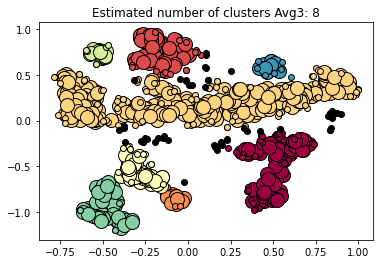

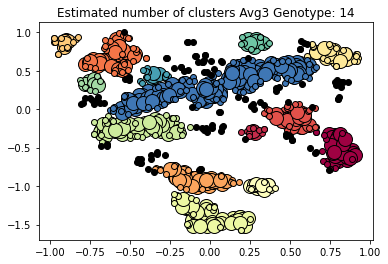

In [43]:
def load_data(filename, dim,dim_x):
    print("Loading ",filename)
    data = np.loadtxt(filename)
    fit = data[:, 0:1]
    cent = data[:,1: dim+1]
    desc = data[:,dim+1: 2*dim+1]
    x = data[:,2*dim+1:2*dim+1+dim_x]
    
def load_centroids(filename):
    points = np.loadtxt(filename)
    return points


centroids_avg3 = load_centroids("centroids_avg3.dat")
data_avg3 = np.loadtxt("archive_avg3.dat")
fit_avg3 = data_avg3[:,0:1]
geno_avg3 = data_avg3[:, 5: 21]
all_imgs_avg3 = []
for j in range(0, fit_avg3.shape[0]):    
    img1 = draw(geno_avg3[j])
    imgP1 = Image.frombuffer("RGBA",( img1.get_width(),img1.get_height() ),img1.get_data(),"raw","RGBA",0,1)
    img_arr1 = np.array(imgP1)
    flat1 = img_arr1[:,:,0].flatten()
    all_imgs_avg3.append(flat1)    
t_sne = TSNE(n_components = 2, metric = 'hamming')
embed_avg3 = t_sne.fit_transform(all_imgs_avg3)
embed_avg3 = embed_avg3 / np.max(embed_avg3)

db = DBSCAN(eps=0.1, min_samples=12).fit(embed_avg3)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = embed_avg3[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = embed_avg3[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters Avg3: %d" % n_clusters_)
plt.show()



#GENOTYPE

centroids_avg3 = load_centroids("centroids_avg3.dat")
data_avg3 = np.loadtxt("archive_avg3.dat")
fit_avg3 = data_avg3[:,0:1]
geno_avg3 = data_avg3[:, 5: 21]
all_imgs_avg3 = []
for j in range(0, fit_avg3.shape[0]):    
    img1 = draw(geno_avg3[j])
    imgP1 = Image.frombuffer("RGBA",( img1.get_width(),img1.get_height() ),img1.get_data(),"raw","RGBA",0,1)
    img_arr1 = np.array(imgP1)
    flat1 = img_arr1[:,:,0].flatten()
    all_imgs_avg3.append(flat1)    
t_sne = TSNE(n_components = 2, metric = 'euclidean')
embed_avg3 = t_sne.fit_transform(all_imgs_avg3)
embed_avg3 = embed_avg3 / np.max(embed_avg3)

db = DBSCAN(eps=0.1, min_samples=12).fit(embed_avg3)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = embed_avg3[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = embed_avg3[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters Avg3 Genotype: %d" % n_clusters_)
plt.show()


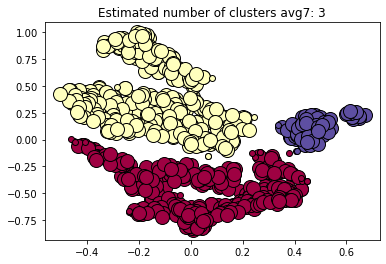

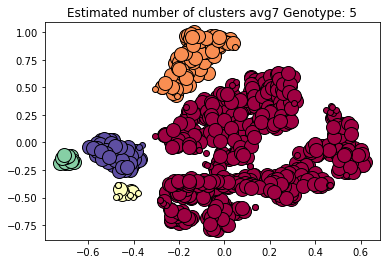

In [44]:
centroids_avg7 = load_centroids("centroids_avg7.dat")
data_avg7 = np.loadtxt("archive_avg7.dat")
fit_avg7 = data_avg7[:,0:1]
geno_avg7 = data_avg7[:, 5: 21]
all_imgs_avg7 = []
for j in range(0, fit_avg7.shape[0]):    
    img1 = draw(geno_avg7[j])
    imgP1 = Image.frombuffer("RGBA",( img1.get_width(),img1.get_height() ),img1.get_data(),"raw","RGBA",0,1)
    img_arr1 = np.array(imgP1)
    flat1 = img_arr1[:,:,0].flatten()
    all_imgs_avg7.append(flat1)    
t_sne = TSNE(n_components = 2, metric = 'hamming')
embed_avg7 = t_sne.fit_transform(all_imgs_avg7)
embed_avg7 = embed_avg7 / np.max(embed_avg7)

db = DBSCAN(eps=0.1, min_samples=12).fit(embed_avg7)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = embed_avg7[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = embed_avg7[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters avg7: %d" % n_clusters_)
plt.show()



#GENOTYPE

centroids_avg7 = load_centroids("centroids_avg7.dat")
data_avg7 = np.loadtxt("archive_avg7.dat")
fit_avg7 = data_avg7[:,0:1]
geno_avg7 = data_avg7[:, 5: 21]
all_imgs_avg7 = []
for j in range(0, fit_avg7.shape[0]):    
    img1 = draw(geno_avg7[j])
    imgP1 = Image.frombuffer("RGBA",( img1.get_width(),img1.get_height() ),img1.get_data(),"raw","RGBA",0,1)
    img_arr1 = np.array(imgP1)
    flat1 = img_arr1[:,:,0].flatten()
    all_imgs_avg7.append(flat1)    
t_sne = TSNE(n_components = 2, metric = 'euclidean')
embed_avg7 = t_sne.fit_transform(all_imgs_avg7)
embed_avg7 = embed_avg7 / np.max(embed_avg7)

db = DBSCAN(eps=0.1, min_samples=12).fit(embed_avg7)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = embed_avg7[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = embed_avg7[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters avg7 Genotype: %d" % n_clusters_)
plt.show()


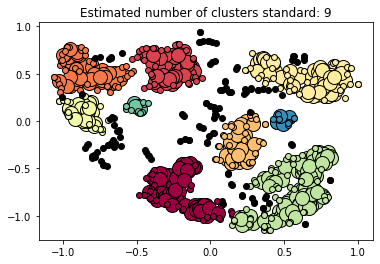

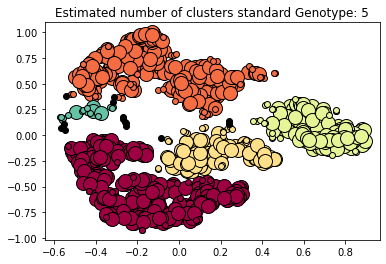

In [45]:
centroids_standard = load_centroids("centroids_standard.dat")
data_standard = np.loadtxt("archive_standard.dat")
fit_standard = data_standard[:,0:1]
geno_standard = data_standard[:, 5: 21]
all_imgs_standard = []
for j in range(0, fit_standard.shape[0]):    
    img1 = draw(geno_standard[j])
    imgP1 = Image.frombuffer("RGBA",( img1.get_width(),img1.get_height() ),img1.get_data(),"raw","RGBA",0,1)
    img_arr1 = np.array(imgP1)
    flat1 = img_arr1[:,:,0].flatten()
    all_imgs_standard.append(flat1)    
t_sne = TSNE(n_components = 2, metric = 'hamming')
embed_standard = t_sne.fit_transform(all_imgs_standard)
embed_standard = embed_standard / np.max(embed_standard)

db = DBSCAN(eps=0.1, min_samples=12).fit(embed_standard)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = embed_standard[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = embed_standard[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters standard: %d" % n_clusters_)
plt.show()



#GENOTYPE

centroids_standard = load_centroids("centroids_standard.dat")
data_standard = np.loadtxt("archive_standard.dat")
fit_standard = data_standard[:,0:1]
geno_standard = data_standard[:, 5: 21]
all_imgs_standard = []
for j in range(0, fit_standard.shape[0]):    
    img1 = draw(geno_standard[j])
    imgP1 = Image.frombuffer("RGBA",( img1.get_width(),img1.get_height() ),img1.get_data(),"raw","RGBA",0,1)
    img_arr1 = np.array(imgP1)
    flat1 = img_arr1[:,:,0].flatten()
    all_imgs_standard.append(flat1)    
t_sne = TSNE(n_components = 2, metric = 'euclidean')
embed_standard = t_sne.fit_transform(all_imgs_standard)
embed_standard = embed_standard / np.max(embed_standard)

db = DBSCAN(eps=0.1, min_samples=12).fit(embed_standard)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = embed_standard[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = embed_standard[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters standard Genotype: %d" % n_clusters_)
plt.show()


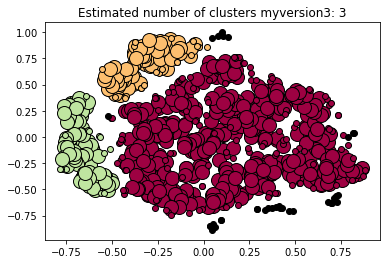

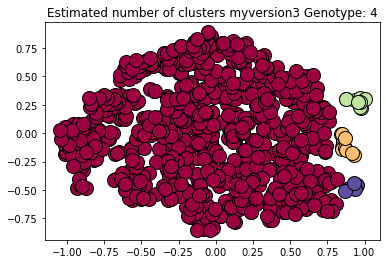

In [35]:
centroids_myversion3 = load_centroids("centroids_myversion3.dat")
data_myversion3 = np.loadtxt("archive_myversion3.dat")
fit_myversion3 = data_myversion3[:,0:1]
geno_myversion3 = data_myversion3[:, 5: 21]
all_imgs_myversion3 = []
for j in range(0, fit_myversion3.shape[0]):    
    img1 = draw(geno_myversion3[j])
    imgP1 = Image.frombuffer("RGBA",( img1.get_width(),img1.get_height() ),img1.get_data(),"raw","RGBA",0,1)
    img_arr1 = np.array(imgP1)
    flat1 = img_arr1[:,:,0].flatten()
    all_imgs_myversion3.append(flat1)    
t_sne = TSNE(n_components = 2, metric = 'hamming')
embed_myversion3 = t_sne.fit_transform(all_imgs_myversion3)
embed_myversion3 = embed_myversion3 / np.max(embed_myversion3)

db = DBSCAN(eps=0.1, min_samples=12).fit(embed_myversion3)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = embed_myversion3[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = embed_myversion3[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters myversion3: %d" % n_clusters_)
plt.show()



#GENOTYPE

centroids_myversion3 = load_centroids("centroids_myversion3.dat")
data_myversion3 = np.loadtxt("archive_myversion3.dat")
fit_myversion3 = data_myversion3[:,0:1]
geno_myversion3 = data_myversion3[:, 5: 21]
all_imgs_myversion3 = []
for j in range(0, fit_myversion3.shape[0]):    
    img1 = draw(geno_myversion3[j])
    imgP1 = Image.frombuffer("RGBA",( img1.get_width(),img1.get_height() ),img1.get_data(),"raw","RGBA",0,1)
    img_arr1 = np.array(imgP1)
    flat1 = img_arr1[:,:,0].flatten()
    all_imgs_myversion3.append(flat1)    
t_sne = TSNE(n_components = 2, metric = 'euclidean')
embed_myversion3 = t_sne.fit_transform(all_imgs_myversion3)
embed_myversion3 = embed_myversion3 / np.max(embed_myversion3)

db = DBSCAN(eps=0.1, min_samples=1).fit(embed_myversion3)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = embed_myversion3[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = embed_myversion3[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters myversion3 Genotype: %d" % n_clusters_)
plt.show()


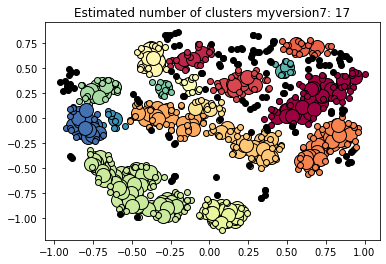

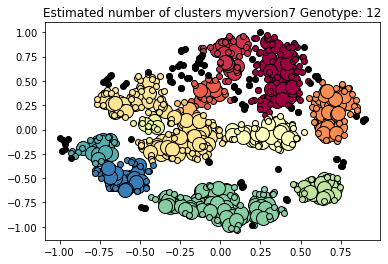

In [47]:
centroids_myversion7 = load_centroids("centroids_myversion7.dat")
data_myversion7 = np.loadtxt("archive_myversion7.dat")
fit_myversion7 = data_myversion7[:,0:1]
geno_myversion7 = data_myversion7[:, 5: 21]
all_imgs_myversion7 = []
for j in range(0, fit_myversion7.shape[0]):    
    img1 = draw(geno_myversion7[j])
    imgP1 = Image.frombuffer("RGBA",( img1.get_width(),img1.get_height() ),img1.get_data(),"raw","RGBA",0,1)
    img_arr1 = np.array(imgP1)
    flat1 = img_arr1[:,:,0].flatten()
    all_imgs_myversion7.append(flat1)    
t_sne = TSNE(n_components = 2, metric = 'hamming')
embed_myversion7 = t_sne.fit_transform(all_imgs_myversion7)
embed_myversion7 = embed_myversion7 / np.max(embed_myversion7)

db = DBSCAN(eps=0.1, min_samples=12).fit(embed_myversion7)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = embed_myversion7[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = embed_myversion7[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters myversion7: %d" % n_clusters_)
plt.show()



#GENOTYPE

centroids_myversion7 = load_centroids("centroids_myversion7.dat")
data_myversion7 = np.loadtxt("archive_myversion7.dat")
fit_myversion7 = data_myversion7[:,0:1]
geno_myversion7 = data_myversion7[:, 5: 21]
all_imgs_myversion7 = []
for j in range(0, fit_myversion7.shape[0]):    
    img1 = draw(geno_myversion7[j])
    imgP1 = Image.frombuffer("RGBA",( img1.get_width(),img1.get_height() ),img1.get_data(),"raw","RGBA",0,1)
    img_arr1 = np.array(imgP1)
    flat1 = img_arr1[:,:,0].flatten()
    all_imgs_myversion7.append(flat1)    
t_sne = TSNE(n_components = 2, metric = 'euclidean')
embed_myversion7 = t_sne.fit_transform(all_imgs_myversion7)
embed_myversion7 = embed_myversion7 / np.max(embed_myversion7)

db = DBSCAN(eps=0.1, min_samples=12).fit(embed_myversion7)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = embed_myversion7[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = embed_myversion7[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters myversion7 Genotype: %d" % n_clusters_)
plt.show()
